# Language Detection with Scikit-learn
This project focuses on identifying the language of a given text by training a machine learning model on examples from 22 different languages.
***

## 1. Setup and Imports
This section contains the first cell where you import all necessary libraries like numpy, pandas, sklearn, seaborn, etc.
***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

***

## 2. Exploratory Data Analysis (EDA)


In [3]:
df = pd.read_csv('D:\\Deep_Learning\\Language Detection\\data\\raw\\dataset\\Language Detection.csv')

In [4]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


The dataset is structured with two columns: Text, which contains raw text samples, and Language, which represents the target label. There are 22,000 rows in total, evenly distributed across 22 languages (1,000 samples each).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [6]:
df.isnull().any()

Text        False
language    False
dtype: bool

In [7]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: count, dtype: int64

The dataset is perfectly balanced, with exactly 1000 text samples for each of the 22 languages. This is ideal as it prevents any inherent bias in the model during training.


In [8]:
len(df['language'].unique())

22

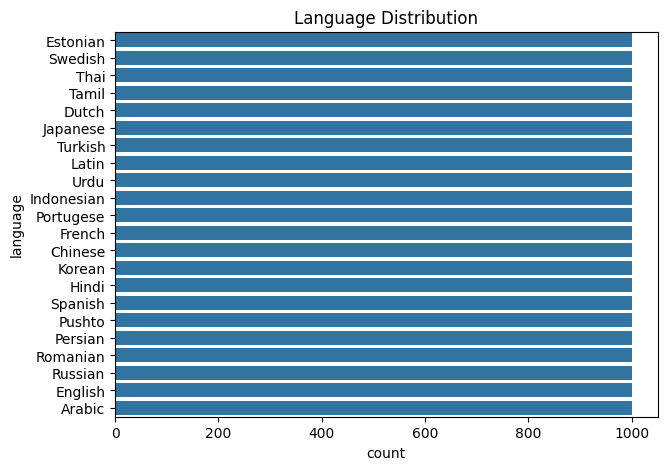

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(y='language', data=df, order=df['language'].value_counts().index)
plt.title('Language Distribution')
plt.show()

***

## 3. Data Preprocessing and Feature Extraction

Converted the raw text into numerical vectors using a TF-IDF strategy. I am using character n-grams (analyzer='char') as they are often more effective for language detection than whole words. The data is split into a training and testing set before vectorization to prevent data leakage.
***

In [ ]:
x = np.array(df['Text'])
y = np.array(df['language'])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
with open('D:\\Deep_Learning\\Language Detection\\saved_models\\vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

***

## 4. Model Training and Evaluation

### 4.1 Baseline Model: Multinomial Naive Bayes

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
y_pred = model.predict(X_test_vec)

Model Accuracy: 0.9765

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.99      0.98      0.99       291
       Dutch       0.98      0.97      0.98       313
     English       0.72      1.00      0.83       289
    Estonian       1.00      0.95      0.97       308
      French       0.96      0.99      0.97       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       1.00      0.96      0.98       295
    Japanese       1.00      0.99      0.99       302
      Korean       1.00      0.99      0.99       296
       Latin       0.99      0.89      0.94       312
     Persian       0.99      1.00      0.99       299
   Portugese       0.99      0.94      0.96       293
      Pushto       1.00      0.96      0.98       303
    Romanian       1.00      0.98      0.99       291
     Russian       0.99      1.00      0.99       302
     Spanish       0.98      0.99

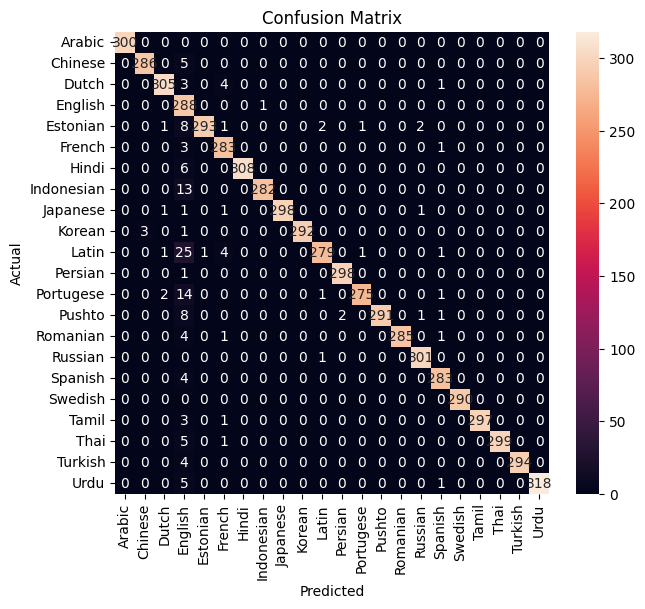

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***
The Naive Bayes model achieved an impressive accuracy of 97.65%. However, the classification report and confusion matrix reveal a key weakness: a low precision score for English (0.72), indicating that many other languages were being misclassified as English.
***

### 4.2 Improved Model: Support Vector Machine (SVM)

In [ ]:
print("Training the SVM model...")
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_vec, y_train)
print("Training complete!")

y_pred_svm = model_svm.predict(X_test_vec)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Model Accuracy: {accuracy_svm:.4f}")

print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Training the SVM model...
Training complete!

SVM Model Accuracy: 0.9832

Classification Report (SVM):
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.99      0.98      0.98       291
       Dutch       0.99      0.99      0.99       313
     English       0.83      0.99      0.90       289
    Estonian       0.99      0.97      0.98       308
      French       0.97      0.98      0.98       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       1.00      0.98      0.99       295
    Japanese       1.00      0.99      1.00       302
      Korean       1.00      0.99      0.99       296
       Latin       0.94      0.94      0.94       312
     Persian       1.00      1.00      1.00       299
   Portugese       0.97      0.98      0.98       293
      Pushto       1.00      0.97      0.98       303
    Romanian       1.00      0.98      0.99       291
     Russian       0.99      1.

***
To address the issue with English predictions, I experimented with a Support Vector Machine (SVM). This not only increased the overall accuracy to 98.32%, but also improved the precision for English significantly (from 0.72 to 0.83), resulting in a more balanced and reliable model.
***

## 5. Conclusion
The SVM model was selected as the final model. It will now be saved to a file (model_svm.pkl) so it can be used in a separate script for real-world predictions.



In [17]:
with open('../saved_models/model_svm.pkl', 'wb') as f:
    pickle.dump(model_svm, f)